# Data Visualization Notebook

## Objectives

*   Answer business requirement 1: 
    * The client is interested to have a study to visually differentiate an parasitized and uninfected cell.


## Inputs

* inputs/malaria_dataset

## Outputs

* Labels distribution on train, validation and test set
* Image shape
* Average image and image variabliltiy per label
* Contrast image between labels
* generate code that answers business requirement 1 and can be used to build Streamlit App


## Additional Comments | Insights | Conclusions




---

# Install Packages

In [ ]:
pip show

# Setup GPU

* Go to Edit → Notebook Settings
* In the Hardware accelerator menu, selects GPU
* note: when you select an option, either GPU, TPU or None, you switch among kernels/sessions

---
* How to know if I am using the GPU?
  * run the code below, if the output is different than '0' or null/nothing, you are using GPU in this session
  * Typically the output will be /device:GPU:0


# **Connection between: Colab Session and your GitHub Repo**

### Insert your **credentials**

* The variable's content will exist only while the session exists. Once this session terminates, the variable's content will be erased permanently.

---

### **Clone** your GitHub Repo to your current Colab session

* So you can have access to your project's files

---

### **Connect** this Colab session to your GitHub Repo

* So if you need, you can push files generated in this session to your Repo.

* If output above indicates there was a **failure in the authentication**, please insert again your credentials.

---

# Set Data Directory

Import libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
from matplotlib.image import imread

In [3]:

import os
current_dir = os.getcwd()
current_dir

'/workspace/WalkthroughProject01/jupyter_notebooks'

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [5]:
current_dir = os.getcwd()
current_dir

'/workspace/WalkthroughProject01'

Quick Data Exploration

In [6]:
my_data_dir = f"inputs/malaria_dataset/cell_images"

labels_train = os.listdir(my_data_dir+ '/train')
labels_val = os.listdir(my_data_dir+ '/validation')
labels_test = os.listdir(my_data_dir+ '/test')
labels = list(set(labels_train + labels_test))

print(
    f"Labels on train set: {labels_train}\n"
    f"Labels on validation set: {labels_val}\n"
    f"Labels on test set: {labels_test}\n"
    f"Project Labels: {labels}"
    )

Labels on train set: ['Parasitized', 'Uninfected']
Labels on validation set: ['Parasitized', 'Uninfected']
Labels on test set: ['Parasitized', 'Uninfected']
Project Labels: ['Parasitized', 'Uninfected']


Set train, validation and test paths

In [7]:
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'
train_path

'inputs/malaria_dataset/cell_images/train'

---

# Check Labels Distribution

* train set - Parasitized: 3950 images
* train set - Uninfected: 3950 images
* validation set - Parasitized: 564 images
* validation set - Uninfected: 564 images
* test set - Parasitized: 1129 images
* test set - Uninfected: 1129 images




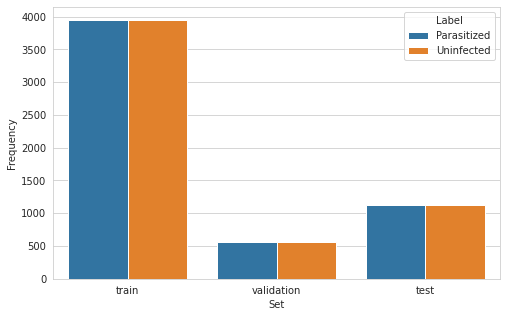

In [8]:
df_freq = pd.DataFrame([]) 
for folder in ['train', 'validation', 'test']:
  for label in labels:
    df_freq = df_freq.append(
        pd.Series(data={'Set': folder,
                        'Label': label,
                        'Frequency':int(len(os.listdir(my_data_dir+'/'+ folder + '/' + label)))}
                  ),
                  ignore_index=True
        )
    
    print(f"* {folder} set - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.show()

---

## Image Montage

In [9]:
import itertools
import random

# logic
# if label exists in the folder
  # check if your montage space is greater tha nsubset size
  # create list of axes indices based on nrows and ncols
  # create a Figure and display images
    # in this loop, load and plot given image


def image_montage(dir_path, label_to_display, nrows, ncols, figsize=(15,10)):
  sns.set_style("white")

  labels = os.listdir(dir_path)

  # subset the class you are interested to display
  if label_to_display in labels:

    # checks if your montage space is greater than subset size
    images_list = os.listdir(dir_path+'/'+ label_to_display)
    if nrows * ncols < len(images_list):
      img_idx = random.sample(images_list, nrows * ncols)
    else:
      print(
          f"Decrease nrows or ncols to create your montage. \n"
          f"There are {len(images_list)} in your subset. "
          f"You requested a montage with {nrows * ncols} spaces")
      return
    

    # create list of axes indices based on nrows and ncols
    list_rows= range(0,nrows)
    list_cols= range(0,ncols)
    plot_idx = list(itertools.product(list_rows,list_cols))


    # create a Figure and display images
    fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=figsize)
    for x in range(0,nrows*ncols):
      img = imread(dir_path + '/' + label_to_display + '/' + img_idx[x])
      img_shape = img.shape
      axes[plot_idx[x][0], plot_idx[x][1]].imshow(img)
      axes[plot_idx[x][0], plot_idx[x][1]].set_title(f"Width {img_shape[1]}px x Height {img_shape[0]}px")
      axes[plot_idx[x][0], plot_idx[x][1]].set_xticks([])
      axes[plot_idx[x][0], plot_idx[x][1]].set_yticks([])
    plt.tight_layout()
    plt.show()


  else:
    print("The label you selected doesn't exist.")
    print(f"The existing options are: {labels}")

Run Montage in all labels

Parasitized


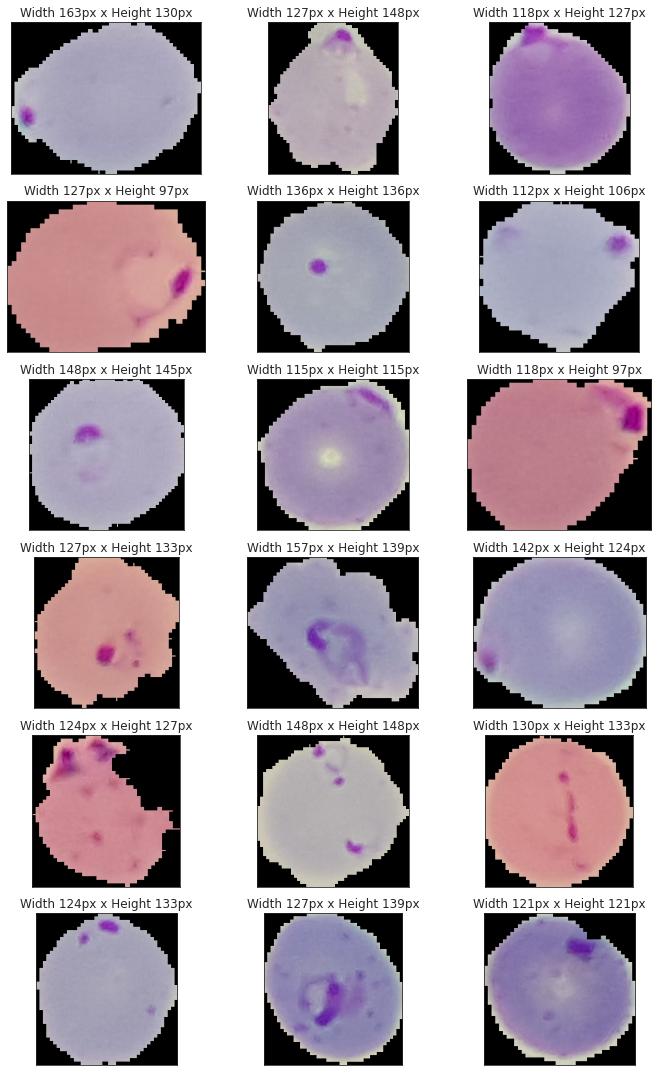



Uninfected


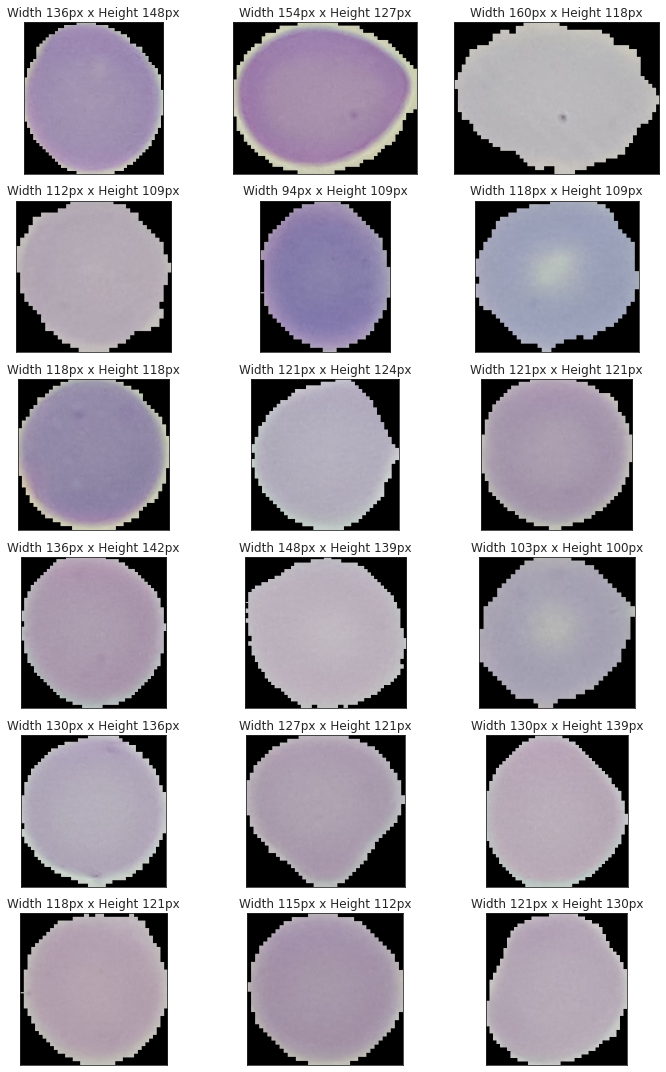

In [10]:
for label in labels:
  print(label)
  image_montage(dir_path= train_path,
                label_to_display= label,
                nrows=6, ncols=3,
                figsize=(10,15)
                )
  print("\n")

---

## Average Image and Image Variability  per Label

Compute images' size on train set

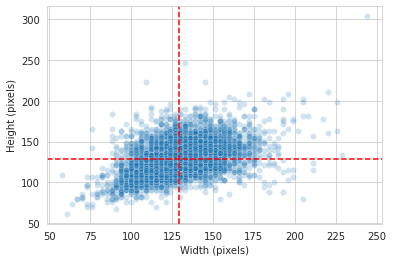

Width average: 129 
Height average: 129


In [11]:
dim1, dim2 = [], []
for label in labels:
  for image_filename in os.listdir(train_path + '/'+ label):
    img = imread(train_path + '/' + label + '/'+ image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1) # image height
    dim2.append(d2) # image width

sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean,color='r', linestyle='--')
axes.axhline(y=dim2_mean,color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")

Images size for training the model is the average from all image in train set

In [12]:
image_shape = (dim1_mean, dim2_mean, 3)
image_shape

(129, 129, 3)

Average Image and Image Variability per Label

In [13]:
from tensorflow.keras.preprocessing import image

def load_image_as_array(my_data_dir, new_size=(50,50), n_images_per_label = 20):
  
  X, y = np.array([], dtype='int'), np.array([], dtype='object')
  labels = os.listdir(my_data_dir)

  for label in labels:
    counter = 0
    for image_filename in os.listdir(my_data_dir + '/' + label):
      # n_images_per_label: we set a limit, since it may take too much time
      if counter < n_images_per_label:
        
        img = image.load_img(my_data_dir + '/' + label + '/' + image_filename, target_size=new_size)
        if image.img_to_array(img).max() > 1: 
          img_resized = image.img_to_array(img) / 255
        else: 
          img_resized = image.img_to_array(img)
        
        X = np.append(X, img_resized).reshape(-1, new_size[0], new_size[1], img_resized.shape[2])
        y = np.append(y, label)
        counter += 1

  return X, y

2021-09-28 15:25:27.654350: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-28 15:25:27.654389: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [14]:
X, y = load_image_as_array(my_data_dir=train_path,
                           new_size=image_shape[0:2],
                          n_images_per_label = 500)
print(X.shape, y.shape)

(1000, 129, 129, 3) (1000,)


Quick loop over the array to check images

Average Image and Image Variability per Label

In [17]:
def image_avg_and_variability_data_as_array(X, y, figsize=(12,5), save_image=False):
  """
   The pseudo code for the function is:
  * Loop in all labels
  * Subset an array for given label
  * Calculate average and standard deviation
  * Create a Figure displaying average and variability image

  """
  sns.set_style("white")

  for label_to_display in np.unique(y):

    y = y.reshape(-1,1,1)
    boolean_mask = np.any(y==label_to_display,axis=1).reshape(-1)
    arr = X[boolean_mask]

    avg_img = np.mean(arr, axis = 0)
    std_img = np.std(arr, axis = 0)
    print(f"==== Label {label_to_display} ====")
    print(f"Image Shape: {avg_img.shape}")
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    axes[0].set_title(f"Average Image for label {label_to_display}")
    axes[0].imshow(avg_img, cmap='gray')
    axes[1].set_title(f"Image Variability for label {label_to_display}")
    axes[1].imshow(std_img, cmap='gray')

    if save_image:
      plt.savefig(f"{file_path}/avg_{label_to_display}.png", bbox_inches='tight', dpi=150)
    else:
      plt.tight_layout()
      plt.show()
      print("\n")

==== Label Parasitized ====
Image Shape: (129, 129, 3)


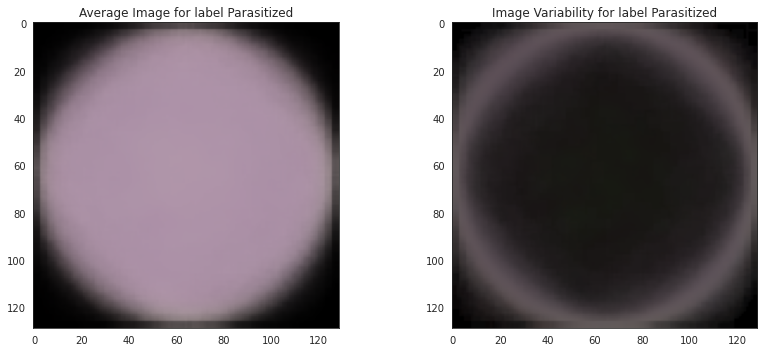



==== Label Uninfected ====
Image Shape: (129, 129, 3)


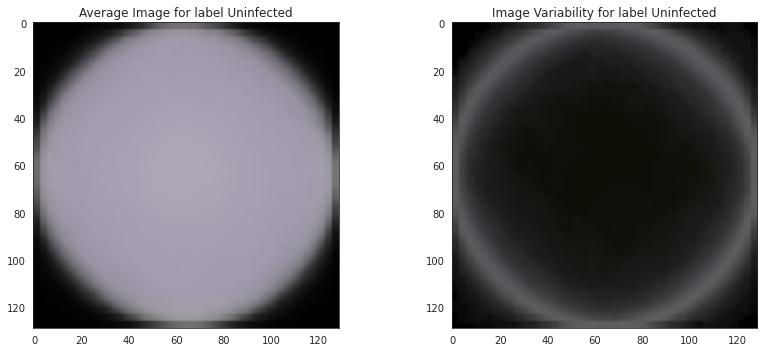

In [18]:
image_avg_and_variability_data_as_array(X=X, y=y, figsize=(12,5))

Contrast between labels

In [19]:
def subset_image_label(X,y,label_to_display):
  y = y.reshape(-1,1,1)
  boolean_mask = np.any(y==label_to_display,axis=1).reshape(-1)
  df = X[boolean_mask]
  return df


def contrast_between_2_labels_data_as_array(X, y, label_1, label_2, figsize=(12,5), save_image=False):
  sns.set_style("white")

  if (label_1 not in np.unique(y)) or (label_2 not in np.unique(y)):
    print(f"Either label {label} or label {label_2}, are not in {np.unique(y)} ")
    return

  # calculate mean from label1
  images_label = subset_image_label(X, y, label_1)
  label1_avg = np.mean(images_label, axis = 0)

  # calculate mean from label2
  images_label = subset_image_label(X, y, label_2)
  label2_avg = np.mean(images_label, axis = 0)

  # calculate difference and plot difference, avg label1 and avg label2
  contrast_mean = label1_avg - label2_avg
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
  axes[0].imshow(contrast_mean, cmap='gray')
  axes[0].set_title(f'Difference Between Averages: {label_1} & {label_2}')
  axes[1].imshow(label1_avg, cmap='gray')
  axes[1].set_title(f'Average {label_1}')
  axes[2].imshow(label2_avg, cmap='gray')
  axes[2].set_title(f'Average {label_2}')


  if save_image:
    plt.savefig(f"{file_path}/avg_diff.png", bbox_inches='tight', dpi=150)
  else:
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


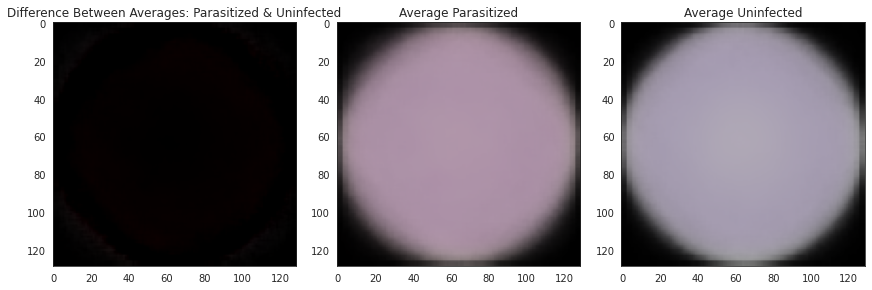

In [20]:
contrast_between_2_labels_data_as_array(X=X, y=y,
                                        label_1='Parasitized', label_2='Uninfected',
                                        figsize=(12,10)
                                        )

---

# Push files to Repo

In [22]:
import joblib
import os

version = 'v1'
file_path = f'outputs/{version}'

try:
  os.makedirs(name=file_path)
except Exception as e:
  print(e)

## Labels distribution across train, validation and test set

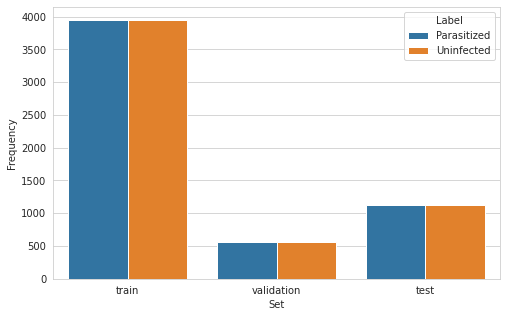

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)

## Average Image shape

In [24]:
image_shape

(129, 129, 3)

In [25]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

['outputs/v1/image_shape.pkl']

## Average Image and Image Variability per Label

==== Label Parasitized ====
Image Shape: (129, 129, 3)
==== Label Uninfected ====
Image Shape: (129, 129, 3)


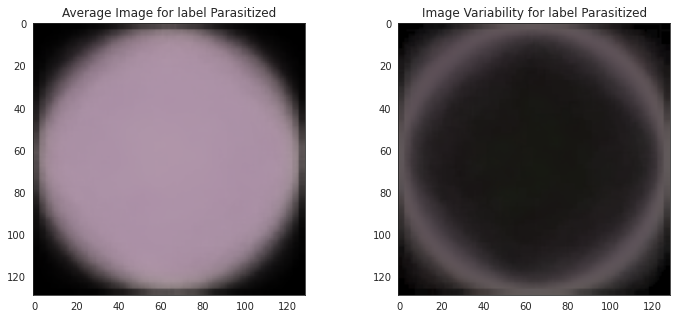

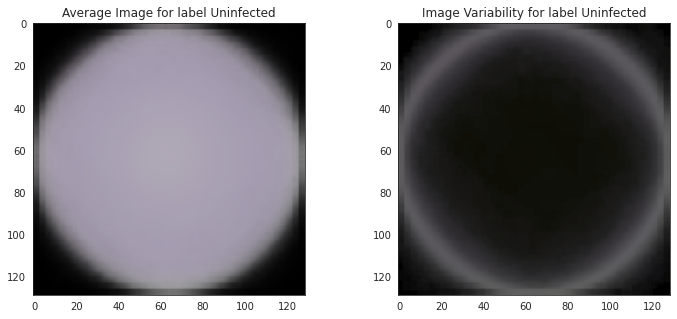

In [26]:
image_avg_and_variability_data_as_array(X=X, y=y, figsize=(12,5), save_image=True)

## Contrast Between Labels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


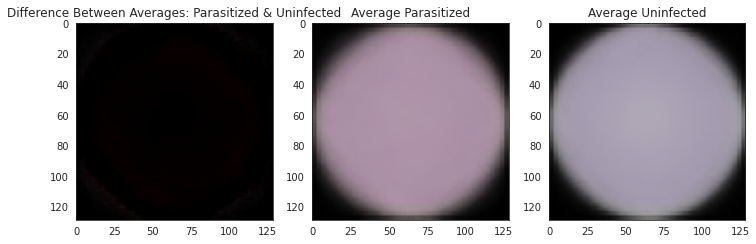

In [27]:
contrast_between_2_labels_data_as_array(X=X, y=y,
                                        label_1='Parasitized',
                                        label_2='Uninfected',
                                        figsize=(12,10),
                                        save_image=True
                                        )

## Push generated/new files from this Session to GitHub repo

* Git status

* Git commit

* Git Push

---